<a href="https://colab.research.google.com/github/aldimastro/Spotify_Hits/blob/main/Entrega_Final_Laverne_Mastrodonato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿Qué características hacen que los tracks de Spotify sean éxitos?**

La cantidad de tracks en Spotify a lo largo de los años ha aumentado exponencialmente. Sin embargo, se observa que no todos son éxitos o poseen gran popularidad entre la gente. 
Se quiere saber si ciertas características influyen en la popularidad de los mismos.
Se busca identificar patrones en los tracks más populares hasta el momento, lo que ayudaría a predecir posibles éxitos en el futuro. 

## ¿Existen patrones particulares en los tracks que puedan ser indicativos de éxitos?

**Contexto analítico.** 
Se busca identificar patrones que respondan a las siguientes preguntas:

1. ¿Qué características de los tracks afectan la popularidad?
2. ¿A lo largo de los años aumento la popularidad?
3. ¿Las canciones explícitas son más populares que las canciones no explícitas?
4. ¿Cómo afecta el instrumentalness (si el track contiene palabras habladas o no) en la popularidad?
5. ¿Cómo afecta la danceability (que tan adecuado es el track para bailar) en la popularidad?
6. ¿Cómo afecta el loudness (que tan ruidoso es un track, medido en decibeles) en la popularidad?
7. ¿Cómo afecta la duración de un track en su popularidad?
8. ¿Qué artistas son los más populares a lo largo de los años?

Para poder verificar esto, se buscaron 2 bases de datos:
1. Una base obtenida de kaggle con tracks de spotify desde el año 1921 hasta 2020. [Ver base](https://www.kaggle.com/datasets/ektanegi/spotifydata-19212020)
2. Buscamos una playlist con 10.000 canciones en spotify con tracks desde 1960 hasta la actualidad. Mediante la librería de spotipy importamos la información desde la API pública de la playlist. En base a la misma obtuvimos un dataframe con los tracks y sus principales características. [Ver playlist](https://open.spotify.com/playlist/1YL4XoegERoragv0RK2RC9?si=ab050d9ab8f84f84)

Luego, unimos ambas bases para complementar la base obtenida de Kaggle con información más actual obtenida desde la API, formando una única base actualizada.

**Descripción de las variables:**
* id del track: Código único del track
* title: Nombre del título del track.
* artist: Nombre de los artistas.
* duration_ms: Duración del track en milisegundos.
* explicit: La letra o el contenido de una canción o de un video de música contiene uno o más de los criterios que son considerados ofensivos o no apto para niños. 
* year: Año de lanzamiento del track.
* popularity: Cuanto más alto el valor, más popular es el track. 
* danceability: Describe qué tan apto es un track para bailar basado en una combinación de elementos musicales. Toma valores de 0 a 1, siendo 0 el menos danzable.  
* energy: Medida entre 0 y 1 que representa una medida porcentual de intensidad y actividad. 
* key: Mapea el tono de un tema usando la notación estándar de clasificación de tonos. Si no se detecta key, el valor es -1. 
* loudness: El volumen general de un track en decibeles (dB). Los valores van en un rango de -60 a 0 db.
* mode: Indica la modalidad (mayor o menor) de un track, el tipo de escala en que la melodía se reproduce. Mayor es representada por 1 y menor por 0.
* speechiness: Detecta la presencia de palabras habladas en un track. Los valores más cercanos a 1 son ejemplo talk show, audio book, poetry. Valores por encima del 0.66 describen tracks que son más probables de tener en casi su totalidad palabras habladas. Entre 0.33 y 0.66 contienen tanto música como palabras habladas. Valores menores a 0.33 probablemente representan música y otros tracks no hablados.
* acousticness: Medida entre 0 y 1 de la confianza en que un track es acústico.
* instrumentalness: Predice si un track es no vocal. Sonidos como "Ooh" y "aah" son considerados instrumentales en este contexto. Rap o tracks con palabras habladas son claramente vocales. Valores cercanos entre 0.5 a 1 son probablemente tracks con contenidos no vocales.
* liveness: Detecta la presencia de una audiencia en la grabación del track. Valores altos de liveness indican mayor probabilidad de un track grabado en vivo. 
* valence: Medida entre 0 y 1 que describe la positividad musical de un track. Tracks con mayor valence suenan más positivos (alegres, euforicos) mientras valores bajos suenan más negativos (tristes, depresivos, enojados). 
* tempo: El tempo general estimado de un track en beats por minutos (BPM). Es la velocidad o el ritmo de un track.

Una vez que obtuvimos la información, realizamos un análisis exploratorio y una limpieza de la misma, analizamos como evoluciono la popularidad a lo largo de los años y cómo afectan ciertas características a la popularidad.

***ACLARACIÓN:*** En la notebook "Unión de bases y guardado_Laverne/Mastrodonato" se puede encontrar la obtención y tratamiento de las dos bases con la unión de las mismas. Luego la descargamos y la subimos a github para poder ahorrarnos tiempo en la ejecución del código y concentrarnos en la evaluación del modelo de machine learning.

In [ ]:
#Importo librerias Necesarias
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/aldimastro/Spotify_Hits/main/base.csv'
base = pd.read_csv(url, index_col=0)
base.head(5)

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,duration_min
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928,11.462446
11,0.989,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,0.0317,85.989,0.3460,1928,1.418912
40,0.977,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,0.0331,80.622,0.0479,1928,3.587855
42,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,0.0322,72.133,0.1350,1928,5.565228
47,0.985,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,0.0329,84.551,0.2760,1928,2.300263


Vemos la cantidad, los tipos de datos de la base y si existen nulos:

In [ ]:
base.shape

(149844, 18)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149844 entries, 4 to 9987
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      149844 non-null  float64
 1   artists           149844 non-null  object 
 2   danceability      149844 non-null  float64
 3   energy            149844 non-null  float64
 4   explicit          149844 non-null  int64  
 5   id                149844 non-null  object 
 6   instrumentalness  149844 non-null  float64
 7   key               149844 non-null  int64  
 8   liveness          149844 non-null  float64
 9   loudness          149844 non-null  float64
 10  mode              149844 non-null  int64  
 11  name              149844 non-null  object 
 12  popularity        149844 non-null  int64  
 13  speechiness       149844 non-null  float64
 14  tempo             149844 non-null  float64
 15  valence           149844 non-null  float64
 16  year              1498

Observamos los valores mínimos, máximos, cuartiles, medias y desvíos de cada característica de los tracks:

In [ ]:
base.describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_min
count,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000,149844.000000
mean,0.411389,0.549448,0.539187,0.084715,0.122239,5.203992,0.202196,-10.453799,0.709525,38.135788,0.077391,118.752616,0.538614,1984.868710,3.900155
std,0.353031,0.172854,0.259809,0.278458,0.273376,3.521618,0.177389,5.313666,0.453983,18.373214,0.101618,30.174960,0.259938,21.844122,1.818484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1921.000000,0.245138
25%,0.058400,0.434000,0.334000,0.000000,0.000000,2.000000,0.095200,-13.243250,0.000000,25.000000,0.034000,95.654500,0.331000,1968.000000,2.932892
50%,0.335000,0.559000,0.552000,0.000000,0.000074,5.000000,0.131000,-9.551000,1.000000,39.000000,0.043400,116.524500,0.548000,1986.000000,3.604797
75%,0.759000,0.674000,0.753000,0.000000,0.020300,8.000000,0.254000,-6.517000,1.000000,51.000000,0.069800,137.165000,0.755000,2004.000000,4.440089
max,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.968000,244.091000,1.000000,2022.000000,90.060135


Una vez obtenida la base, vamos a empezar a analizar las hipotésis / preguntas de interés:

## ¿Qué características de los tracks afectan la popularidad?

Vemos las correlaciones entre las distintas características de los tracks y la popularidad, que es la variable que intentamos clasificar o predecir

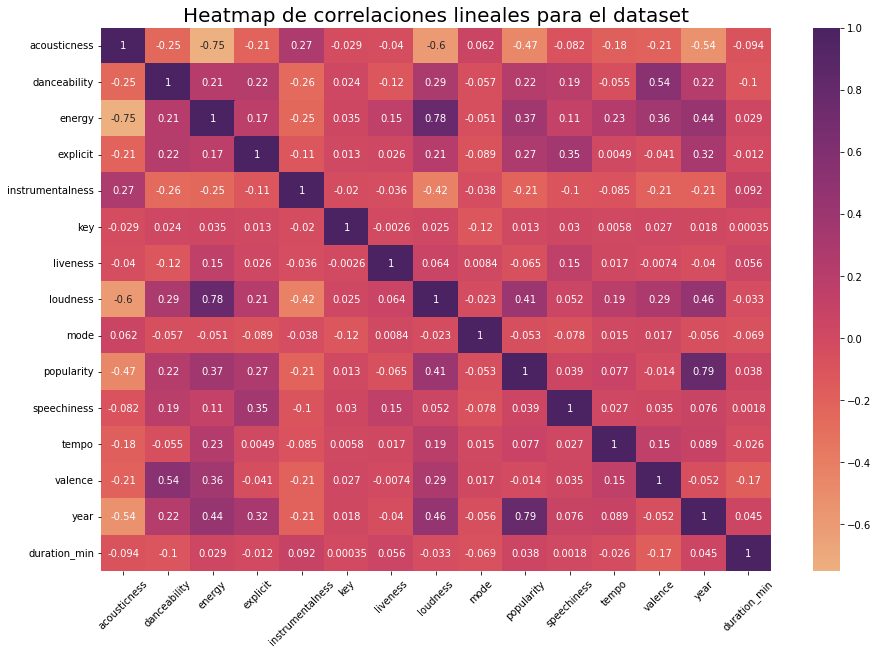

In [ ]:
#Hacemos un heatmap de las correlaciones:
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(base.corr(), annot = True, cmap = 'flare')
plt.title('Heatmap de correlaciones lineales para el dataset', fontsize = 20)
plt.xticks(rotation=45)
plt.show()

Tal como planteamos, buscamos identificar que variables de los tracks afectan la popularidad, para ello observamos las correlaciones: las variables danceability, explicit, loudness, energy y year tienen una correlación positiva con popularity, es decir a medida que aumentan en valor, aumenta la popularidad. Mientras que acousticness e instrumentalness tienen correlación negativa con popularity, es decir a medida que aumentan, disminuye la popularidad. 

## ¿A lo largo de los años aumento la popularidad?

A partir de un gráfico de boxplot, se busca obtener una tendencia de la popularidad de los tracks a lo largo de los años. Se quiere conocer la media, mediana, cuartiles y valores atípicos de la popularidad.

In [ ]:
#Agrupamos la base por año y por valor de popularidad:
Aux=base[['year','popularity','id']].groupby(by=['year','popularity']).count().reset_index()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 <a list of 102 Text major ticklabel objects>)

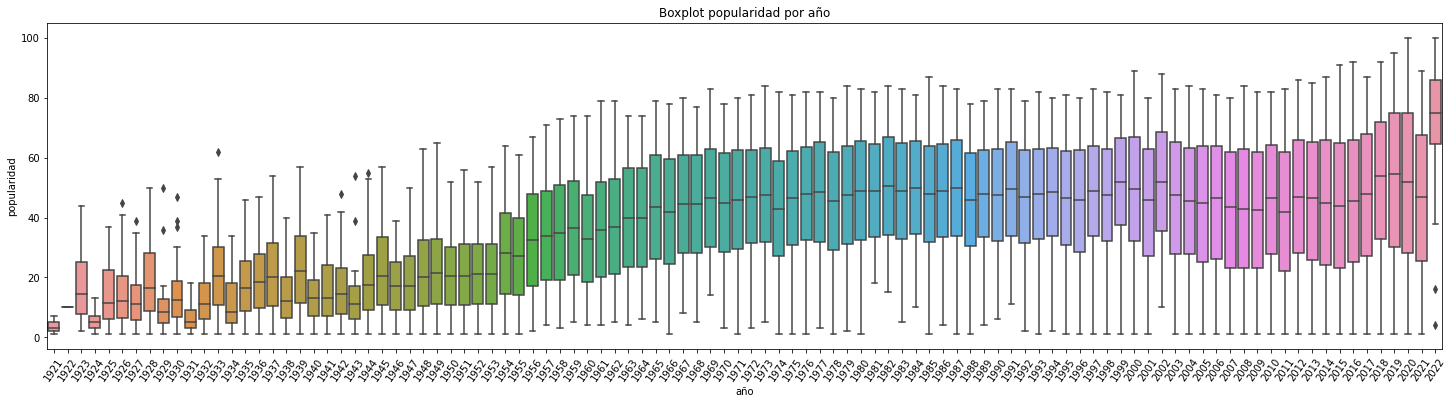

In [ ]:
plt.figure(figsize=(25,6))
sns.boxplot(x=Aux.year, y= Aux.popularity)
plt.title('Boxplot popularidad por año')
plt.xlabel('año')
plt.ylabel('popularidad')
plt.xticks(rotation=55)

Observamos la información de los últimos años, para entender si es significativa:

In [ ]:
a=base[base['year']>=2010]

In [ ]:
a['year'].value_counts()

2011    2281
2014    2279
2012    2249
2017    2238
2010    2232
2016    2232
2015    2206
2013    2203
2018    2200
2019    2190
2020    1914
2021     187
2022      41
Name: year, dtype: int64

Se puede observar que a lo largo de los años la popularidad se ha ido incrementando. 
A su vez, también se observa que la popularidad se mantiene consistente a lo largo de las décadas, a partir de la década del 60 ya que para años anteriores se observa un comportamiento errático y que los años 2021 y 2022 presentan un comportamiento sustancialmente diferente a los años anteriores. Estos comportamientos atípicos se deben a la falta de datos (como pudimos observar previamente son años con la menor cantidad de datos).

Dado esto, observamos el comportamiento de los tracks agrupándolos por décadas y excluyendo los años anteriores a 1970, ya que no son significativos, y los años 2021 y 2022 por no poseer suficiente información (2022 no es un año completo por ejemplo).

In [ ]:
base=base[base['year']>=1970]

In [ ]:
#Creamos la variable decadas
conditions = [base['year']<=1979,
              base['year']<=1989,   
              base['year']<=1999,  
              base['year']<=2009,  
              base['year']<=2020,

              ]  

options = ['Setentas',
           'Ochentas',
           'Noventas',
           'Dos miles',
           'Dos mil 10',
           ]

base['Decadas'] = np.select(conditions,options,default='Ver')

<ipython-input-12-e33bd98320da>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Decadas'] = np.select(conditions,options,default='Ver')


In [ ]:
base=base[base['Decadas']!='Ver']

## ¿Cómo afecta la duración de un track en su popularidad?

Se busca conocer si la duración de un track en minutos afecta la popularidad o no. Es decir, si tracks más cortos son más populares o no.

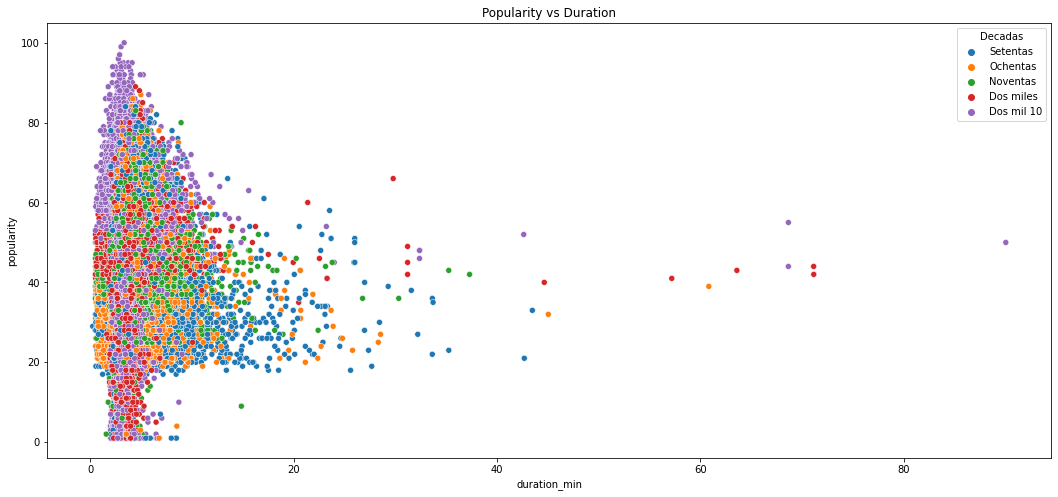

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Popularity vs Duration')
sns.scatterplot(data=base,x='duration_min',y='popularity',hue='Decadas')

***Tratamiento de outliers en la variable Duration***

Se observan ciertos valores atípicos para la duración en minutos de los tracks (valores entre 10 y 30 minutos), se procedió a excluirlos del análisis por no ser tracks representativos.

In [ ]:
# Tomamos columnas de interes
datos = base[['Decadas','duration_min','id']]
datos.shape

(108271, 3)

In [ ]:
from tqdm import tqdm

# Creamos un data frame vacio
outlier = pd.DataFrame()

# Iniciamos el loop que itera por cada decada 
for i in tqdm(datos['Decadas'].drop_duplicates().tolist()):
    
    print("Corriendo segmento "+str(i))
    
    datos_ = datos[(datos['Decadas']==i)]
    datos_z=pd.DataFrame()
    datos_z['Fecha']= datos_.Decadas
    datos_z['duration_min'] = datos_.duration_min
    datos_z['id'] = datos_.id
    datos_z['Z'] = (datos_['duration_min'] - datos_['duration_min'].mean()) / datos_['duration_min'].std()
    datos_z['Status']= datos_z['Z'].apply(lambda x: 'Atipico' if (x>3 or x<-3) else 'Normal')
    datos_z=datos_z[(datos_z['Status']=='Atipico')]

    outlier = outlier.append(datos_z)

 40%|████      | 2/5 [00:00<00:00, 17.66it/s]

Corriendo segmento Setentas
Corriendo segmento Ochentas
Corriendo segmento Noventas
Corriendo segmento Dos miles


100%|██████████| 5/5 [00:00<00:00, 15.31it/s]

Corriendo segmento Dos mil 10


Quitamos los tracks que resultan atípicos por tener una duración mayor:

In [ ]:
Aux=outlier[['id','Status']]
Aux.head(2)

,id,Status
3069,2NJirbzL4zisT8kAM8s3VY,Atipico
3134,0FFGwdVVLc7lBHRP1y7LrS,Atipico


In [ ]:
BaseVF=base.merge(Aux, how='left',on='id')
BaseVF.shape

(108281, 20)

In [ ]:
BaseVF=BaseVF[BaseVF['Status']!='Atipico']
BaseVF=BaseVF.drop(columns=['Status'])
BaseVF.shape

(107127, 19)

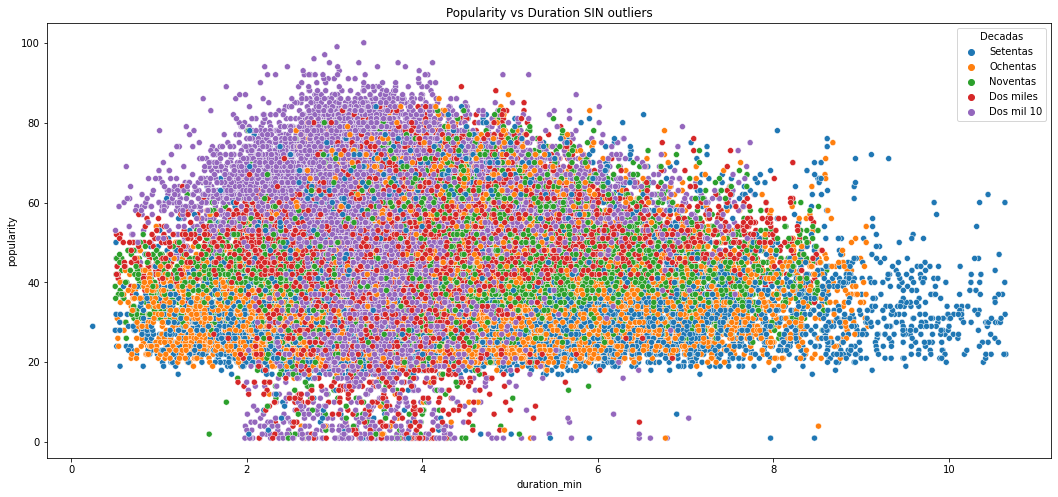

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Popularity vs Duration SIN outliers')
sns.scatterplot(data=BaseVF,x='duration_min',y='popularity',hue='Decadas')

In [ ]:
Aux1=BaseVF[['Decadas','duration_min']].groupby(by=['Decadas']).mean().reset_index()

In [ ]:
conditions = [Aux1['Decadas']== 'Setentas',
              Aux1['Decadas']== 'Ochentas',   
              Aux1['Decadas']==	'Noventas',  
              Aux1['Decadas']==	'Dos miles',
              Aux1['Decadas']==	'Dos mil 10'
              ]  

options = [1970,
           1980,
           1990,
           2000, 
           2010
           ]

Aux1['Decadas_'] = np.select(conditions,options,default=0)

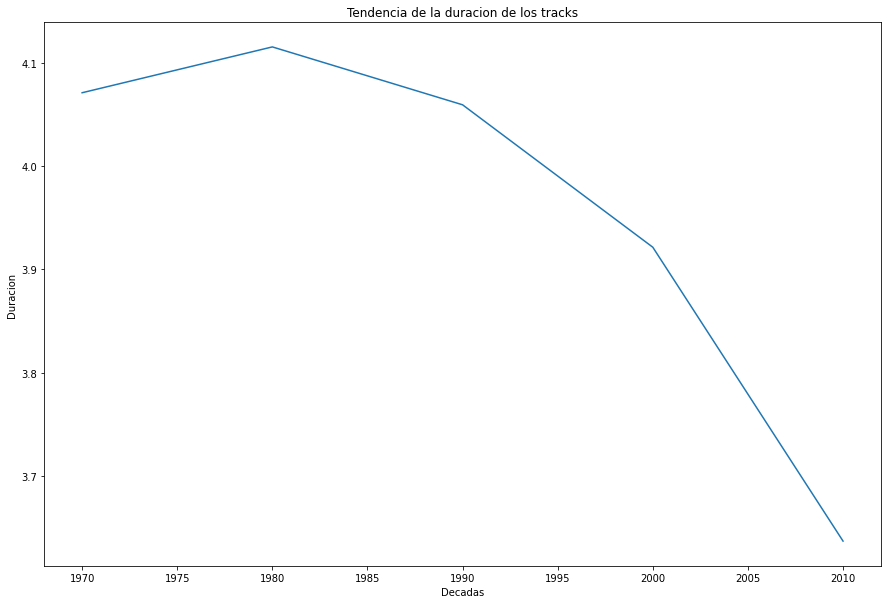

<Figure size 1296x576 with 0 Axes>

In [ ]:
x = Aux1['Decadas_'] 
y = Aux1['duration_min'] 
  
plt.plot(x, y) 


# Personalizamos
plt.title('Tendencia de la duracion de los tracks')
plt.xlabel('Decadas')
plt.ylabel('Duracion')
plt.figure(figsize=(18,8))
plt.tight_layout() # Ajustamos los parámetros para que se obtenga un gráfico limpio
plt.show() # mostrar la grafica

En cuanto a la duración de los tracks, se observa una tendencia a duraciones más cortas (entre 0 y 5 min) y también que el promedio de los tracks va disminuyendo a lo largo de las décadas. Sin embargo, no se puede concluir que la duración de los tracks afecte significativamente a la popularidad.

## ¿Cómo afecta el instrumentalness (si el track contiene palabras habladas o no) en la popularidad? ¿Cómo afecta la danceability (que tan adecuado es el track para bailar) en la popularidad?

Agrupamos por rangos las variables instrumentalness y danceability para poder gráficar por cuartiles:

In [ ]:
conditions = [BaseVF['instrumentalness']<=0.25,
              BaseVF['instrumentalness']<=0.5,   
              BaseVF['instrumentalness']<=0.75,  
              BaseVF['instrumentalness']<=1 
              ]  

options = [1,
           2,
           3,
           4, 
           ]

BaseVF['Instrumental'] = np.select(conditions,options,default=0)

In [ ]:
conditions = [BaseVF['danceability']<=0.25,
              BaseVF['danceability']<=0.5,   
              BaseVF['danceability']<=0.75,  
              BaseVF['danceability']<=1 
              ]  

options = [1,
           2,
           3,
           4, 
           ]

BaseVF['Danzable'] = np.select(conditions,options,default=0)

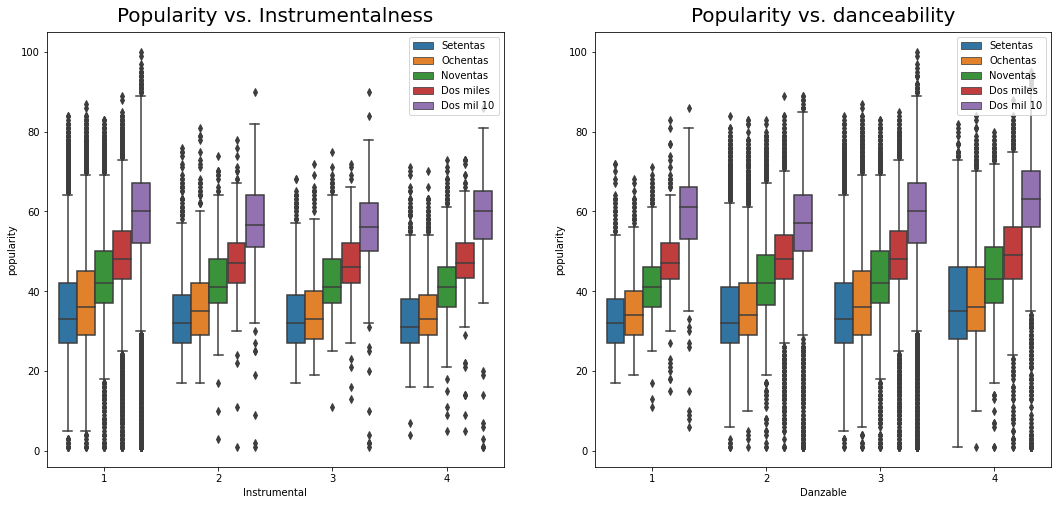

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.boxplot(x='Instrumental', y = 'popularity',hue= 'Decadas', data = BaseVF) 
plt.title("Popularity vs. Instrumentalness", fontsize=20, verticalalignment='bottom')
plt.legend(loc='upper right')

plt.subplot(122)
sns.boxplot(x='Danzable', y = 'popularity',hue= 'Decadas', data = BaseVF) 
plt.title("Popularity vs. danceability", fontsize=20, verticalalignment='bottom')
plt.legend(loc='upper right')


plt.show()

In [ ]:
BaseVF[['name','instrumentalness','Instrumental','popularity']].groupby('name').mean().sort_values(by='popularity',ascending=False).head(15).reset_index()


,name,instrumentalness,Instrumental,popularity
0,death bed (coffee for your head) (feat. beabad...,0.000000,1.0,97.0
1,GOOBA,0.000000,1.0,94.0
2,Sunday Best,0.000000,1.0,93.0
3,Tusa,0.000134,1.0,92.0
4,Yo Perreo Sola,0.000065,1.0,92.0
5,Savage Remix (feat. Beyoncé),0.000000,1.0,92.0
6,Safaera,0.000000,1.0,92.0
7,Play Date,0.000000,1.0,91.0
8,Intentions,0.000000,1.0,90.0
9,TKN (feat. Travis Scott),0.000001,1.0,90.0


In [ ]:
BaseVF[['name','danceability','popularity']].groupby('name').mean().sort_values(by='popularity',ascending=False).head(15).reset_index()

,name,danceability,popularity
0,death bed (coffee for your head) (feat. beabad...,0.726,97.0
1,GOOBA,0.611,94.0
2,Sunday Best,0.878,93.0
3,Tusa,0.803,92.0
4,Yo Perreo Sola,0.860,92.0
5,Savage Remix (feat. Beyoncé),0.822,92.0
6,Safaera,0.607,92.0
7,Play Date,0.680,91.0
8,Intentions,0.811,90.0
9,TKN (feat. Travis Scott),0.776,90.0


Se observa que los tracks más populares se encuentran para niveles de danzabilidad altos (mayores a 0.5 en general). En cuanto a instrumentalness, se puede observar que los tracks más populares son aquellos que poseen un instrumentalness menor a 0.25. 

Si bien de una primera observación del gráfico parecería que hay presencia de outliers, los valores se encuentran en los rangos normales que pueden tomar las variables. Estos valores que pudieran parecer atípicos, en realidad son los tracks más populares, de los que se busca conocer las características.

##¿Las canciones explícitas son más populares que las canciones no explícitas?

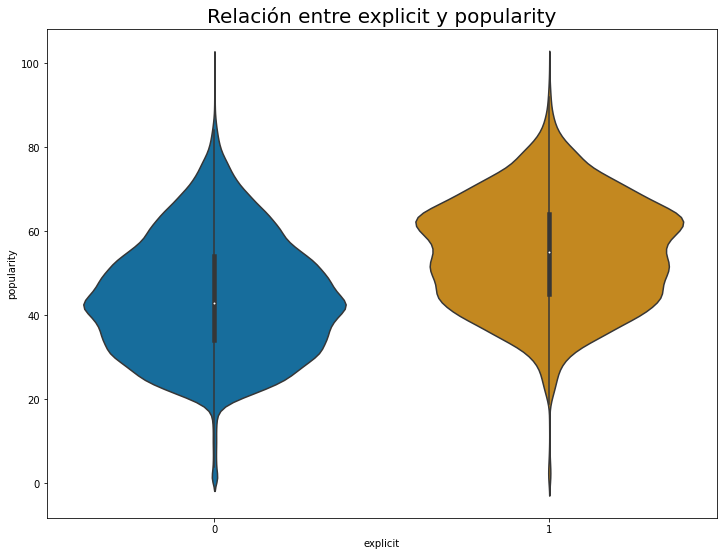

In [ ]:
# explicit vs popularity
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data=BaseVF,x ='explicit', y = 'popularity', palette = 'colorblind')
plt.title('Relación entre explicit y popularity', fontsize = 20, fontweight = 30)
plt.show()

Se puede observar que los tracks explicítos poseen mayor concentración en rangos de popularidad altos, mientras que las canciones no explicítas poseen mayor concentración en rangos medios. Esto se puede visualizar, por ejemplo, observando que la mediana de los tracks explícitos se encuentra en el rango 60/80, mientras que la de los no explícitos se encuentra en el rango 40/60.

## ¿Existe algún patrón en las canciones más populares y las menos populares en cuanto a las variables acousticness, danceability, instrumentalness, energy y valence?

Buscamos las canciones más y menos populares en la base y graficamos sus principales características (acousticness, danceability, instumentalness, energy y valence) para ver si se puede identificar algún patrón

In [ ]:
BaseVF[['name','danceability','popularity']].groupby('name').mean().sort_values(by='popularity',ascending=False).head(20).reset_index()

,name,danceability,popularity
0,death bed (coffee for your head) (feat. beabad...,0.726,97.0
1,GOOBA,0.611,94.0
2,Sunday Best,0.878,93.0
3,Tusa,0.803,92.0
4,Yo Perreo Sola,0.860,92.0
5,Savage Remix (feat. Beyoncé),0.822,92.0
6,Safaera,0.607,92.0
7,Play Date,0.680,91.0
8,Intentions,0.811,90.0
9,TKN (feat. Travis Scott),0.776,90.0


In [ ]:
BaseVF[['name','danceability','popularity']].groupby('name').mean().sort_values(by='popularity',ascending=False).tail(510).reset_index()

,name,danceability,popularity
0,d.a.f,0.560,19.0
1,Tryin' To Stay 'Live,0.594,19.0
2,Less Of Me,0.573,19.0
3,Keep It Warm - 2004 Remaster,0.250,19.0
4,Myopic Void,0.252,19.0
...,...,...,...
505,Love Me Like I Love You,0.570,1.0
506,Your Mama Won't Like Me - 2017 Remaster,0.768,1.0
507,Questions I Can't Answer,0.604,1.0
508,Wake Me Up - Radio Edit,0.460,1.0


Elegimos al azar algunas de las canciones más populares para gráficar y en cuanto a las menos populares elegimos gráficar las que poseen una popularidad menor al promedio de la última década:

Canciones más populares:
- Tusa
- Yo Perreo Sola 
- Stuck with U (with Justin Bieber)	
- Hasta Que Dios Diga

Canciones menos populares:
- Sound Chaser	
- Hamburger Lady - Remastered	
- Nothing Matters
- Squeeze Box - Live	

Buscamos la posición de los tracks elegidos para graficarlos:

In [ ]:
list=['Tusa','Yo Perreo Sola','Stuck with U (with Justin Bieber)','Hasta Que Dios Diga','Sound Chaser','Hamburger Lady - Remastered','Nothing Matters','Squeeze Box - Live']

BaseVF[BaseVF['name'].isin(list)]


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,duration_min,Decadas,Instrumental,Danzable
30929,0.153,['Yes'],0.276,0.823,0,491mibMsLMgOwAtdCsynPm,0.042500,2,0.0922,-7.559,...,Sound Chaser,19,0.1680,147.075,0.2550,1974,9.511307,Setentas,1,2
46271,0.154,['The Who'],0.401,0.941,0,4tek7LxdrKwb1Mc65eHdXK,0.000027,7,0.7450,-8.716,...,Squeeze Box - Live,19,0.2850,137.162,0.3490,1975,4.228535,Setentas,1,2
46570,0.599,['Throbbing Gristle'],0.347,0.591,0,7eAewwhDIvqRKaIuRp71Sv,0.844000,2,0.1010,-20.368,...,Hamburger Lady - Remastered,19,0.1340,83.065,0.0399,1978,4.150466,Setentas,4,2
55776,0.295,"['KAROL G', 'Nicki Minaj']",0.803,0.715,0,7k4t7uLgtOxPwTpFmtJNTY,0.000134,2,0.0574,-3.280,...,Tusa,92,0.2980,101.085,0.5740,2019,3.349400,Dos mil 10,1,4
55820,0.223,"['Ariana Grande', 'Justin Bieber']",0.597,0.450,0,4HBZA5flZLE435QTztThqH,0.000000,8,0.3820,-6.658,...,Stuck with U (with Justin Bieber),94,0.0418,178.765,0.5370,2020,3.808109,Dos mil 10,1,3
55837,0.021,['Bad Bunny'],0.860,0.758,0,0SqqAgdovOE24BzxIClpjw,0.000065,11,0.3440,-5.160,...,Yo Perreo Sola,92,0.0695,97.014,0.4530,2020,2.868841,Dos mil 10,1,4
55868,0.464,"['Anuel AA', 'Bad Bunny']",0.691,0.765,1,06s3QtMJVXw1AJX3UfvZG1,0.000003,8,0.2030,-4.727,...,Hasta Que Dios Diga,88,0.1110,174.021,0.8550,2020,4.100082,Dos mil 10,1,3
105238,0.223,Justin Bieber,0.597,0.450,0,4HBZA5flZLE435QTztThqH,0.000000,8,0.3820,-6.658,...,Stuck with U (with Justin Bieber),82,0.0418,178.765,0.5370,2020,3.808109,Dos mil 10,1,3
105765,0.207,Jess & Matt,0.467,0.715,0,4fgcGJjA7ALwhfzMv5SsZX,0.000000,7,0.1110,-4.594,...,Nothing Matters,18,0.0424,173.866,0.5360,2015,3.035744,Dos mil 10,1,2


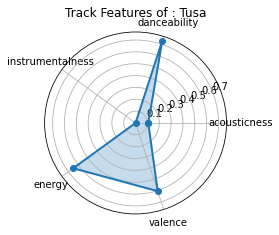

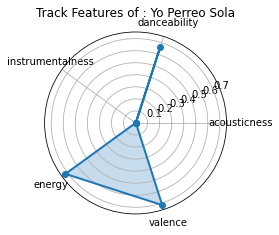

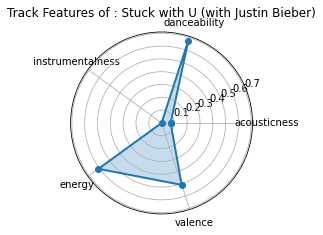

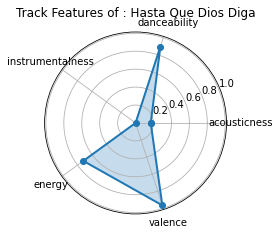

In [ ]:
#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[55777,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))

ax = plt.subplot(141, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[55776,'name'])
ax.grid(True)


#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[55838,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(142, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[55837,'name'])
ax.grid(True)

#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[55821,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(143, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[55820,'name'])
ax.grid(True)

#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[55869,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(144, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[55868,'name'])
ax.grid(True)

De los gráficos de radar, se puede observar que los tracks más populares poseen características similares, se puede observar un patrón.

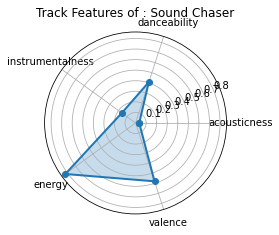

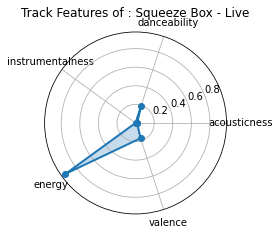

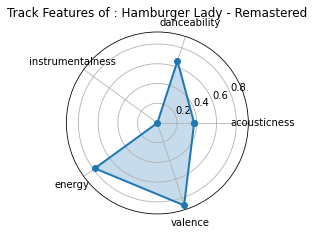

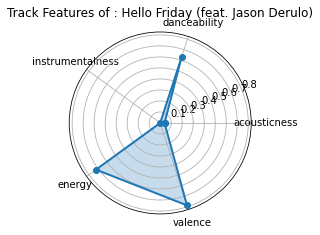

In [ ]:
#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[30930,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))

ax = plt.subplot(141, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[30929,'name'])
ax.grid(True)


#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[46272,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(142, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[46271,'name'])
ax.grid(True)

#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[46571,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(143, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[46570,'name'])
ax.grid(True)

#Elegimos una cancion popular y vemos sus caracteristicas

labels = np.array(['acousticness', 'danceability', 'instrumentalness', 'energy', 'valence'])
song = BaseVF.loc[105791,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.figure(figsize=(15,8))
ax = plt.subplot(144, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title('Track Features of : ' + BaseVF.at[105790,'name'])
ax.grid(True)

De los gráficos de radar, se puede observar que los tracks menos populares no poseen un patrón identificable, son más erráticos.

## Observaciones

*  Se puede observar que a lo largo de los años la popularidad se ha ido incrementando. A su vez, también se observa que la popularidad se mantiene consistente a lo largo de las décadas, a partir de la década del 60 ya que para años anteriores se observa un comportamiento errático y que los años 2021 y 2022 presentan un comportamiento sustancialmente diferente a los años anteriores. Estos comportamientos atípicos se deben a la falta de datos (como pudimos observar previamente son años con la menor cantidad de datos).
* Dado esto, observamos el comportamiento de los tracks agrupándolos por décadas y excluyendo los años anteriores a 1970, ya que no son significativos, y los años 2021 y 2022 por no poseer suficiente información (2022 no es un año completo por ejemplo).
*  Se excluyen los tracks con popularidad 0, ya que en la mayoría de los casos son una nueva versión de un track ya existente que si tiene informacion de popularidad. Cuando la popularidad indica 0 no tiene sentido mantener el dato, ya que es información nula y al representar la variable objetivo esto alteraría los análisis posteriores.
* En cuanto a la duración de los tracks, se observa una tendencia a duraciones más cortas (entre 0 y 5 min) y también que el promedio de los tracks va disminuyendo a lo largo de las décadas. Sin embargo, no se puede concluir que la duración de los tracks afecte significativamente a la popularidad.
*  Se observa que los tracks más populares se encuentran para niveles de danzabilidad altos (mayores a 0.5 en general). En cuanto a instrumentalness, se puede observar que los tracks más populares son aquellos que poseen un instrumentalness menor a 0.25. 
* Se puede observar que los tracks explicítos poseen mayor concentración en rangos de popularidad altos, mientras que las canciones no explicítas poseen mayor concentración en rangos medios. Esto se puede visualizar, por ejemplo, observando que la mediana de los tracks explícitos se encuentra en el rango 60/80, mientras que la de los no explícitos se encuentra en el rango 40/60.
*  De los gráficos de radar, se puede observar que los tracks más populares poseen características similares, se puede observar un patrón y que, los tracks menos populares no poseen un patrón identificable, son más erráticos.




## Entrenando un algoritmo de Machine Learning

A partir de los datos obtenidos, vamos a buscar realizar un modelo que logre predecir un éxito a partir de las características más relevantes.

Decidimos clasificar los tracks en éxitos (1) o no éxitos (0). Para esto, definimos que un track se considera un éxito en base a la variable popularidad. 

Adicionalmente, decidimos segregar por décadas ya que como podemos observar en el EDA, la popularidad va variando a lo largo de las décadas y por lo que se puede observar la última década es la más representativa en cuanto a popularidad.

Redefinimos la variable objetivo en base a popularidad.

In [ ]:
BaseVF.groupby('Decadas')['popularity'].agg(['max','min','mean'])

,max,min,mean
Decadas,,,
Dos mil 10,100,1,58.809371
Dos miles,89,1,49.119794
Noventas,83,1,43.884258
Ochentas,87,1,37.574739
Setentas,84,1,35.583837


**Encoding**: Se realizó más arriba en la limpieza de la base, la codificación de la variable categórica explicit.

Definimos la variable objetivo de popularidad por década, teniendo en cuenta que van a ser éxitos si supera la popularidad promedio, ya que se observa una gran variabilidad de los máximos, mínimos y promedios por décadas.

In [ ]:
conditions = [   
              (BaseVF['popularity']<=60) &(BaseVF['Decadas']=='Dos mil 10'),  
              (BaseVF['popularity']>60) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Dos mil 10'),
              (BaseVF['popularity']<=50) &(BaseVF['Decadas']=='Dos miles'),  
              (BaseVF['popularity']>50) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Dos miles'),
              (BaseVF['popularity']<=45) &(BaseVF['Decadas']=='Noventas'),  
              (BaseVF['popularity']>45) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Noventas'),  
              (BaseVF['popularity']<=40) &(BaseVF['Decadas']=='Ochentas'),  
              (BaseVF['popularity']>40) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Ochentas'),
              (BaseVF['popularity']<=35) &(BaseVF['Decadas']=='Setentas'),  
              (BaseVF['popularity']>35) & (BaseVF['popularity']<=100) & (BaseVF['Decadas']=='Setentas')]

options = [0,
           1,
           0,
           1,
           0,
           1,
           0,
           1,
           0,
           1,
         ]

BaseVF['target'] = np.select(conditions,options,default=999)

In [ ]:
BaseVF.columns

Index(['acousticness', 'artists', 'danceability', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year', 'duration_min',
       'Decadas', 'Instrumental', 'Danzable', 'target'],
      dtype='object')

In [ ]:
A=BaseVF[(BaseVF['Decadas']=='Dos mil 10')]

**Ingeniería de atributos:** 

Para nuestro modelo decidimos utilizar la última década (años 2010 a 2020) por su significatividad como vimos en el EDA. 

También quitamos las siguientes variables del análisis: artists, id, name, Instrumental, Danzable (variables creadas para segmentar las variables instrumentalness y danceability), Decadas, tempo, year y popularity (variable a predecir).

Dejando de esta manera las variables que observamos en el EDA como las más relevantes que influyen en la popularidad, a saber: acousticness, danceability, energy, explicit, instrumentalness, key, liveness, loudness, mode, speechiness, valence, duration_min.

### Comparativo de modelos y creación de variable sintética

***ACLARACIÓN:*** En la notebook "Entrenamiento ML_Laverne/Mastrodonato" se puede encontrar la evaluación de distintos modelos de machine learning. Se quitaron de este notebook para reducir la extensión del mismo a fines de que sea más claro el contenido final. A continuación, se exponen los resultados obtenidos:

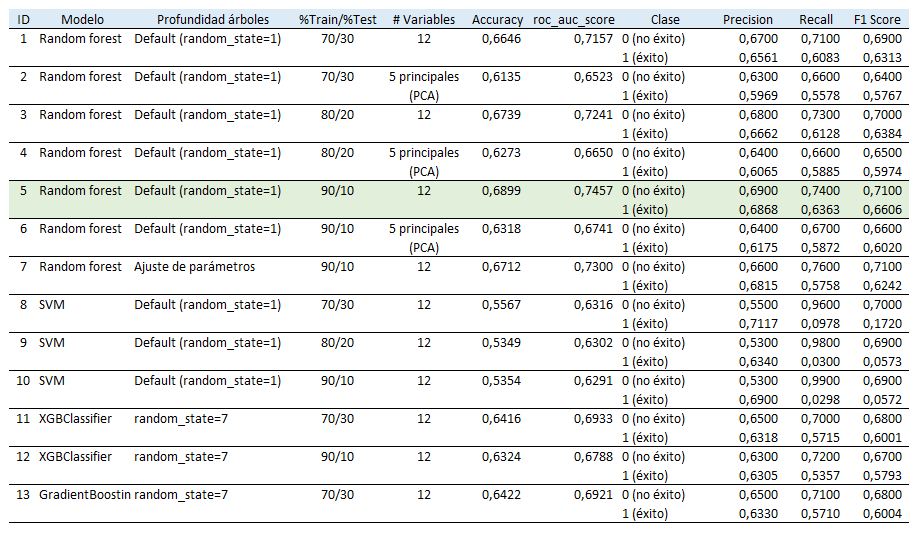

De todos los modelos, el que obtuvo las mejores métricas fue el random forest, con los parámetros en default (random_state=1), entrenando 90%/10% y con la totalidad de las 12 variables: 'acousticness', 'danceability', 'energy', 'explicit',       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'duration_min'

Creamos una nueva variable que cuente la cantidad de hits que tienen los artistas para poder mejorar el rendimiento del modelo. Entendemos que ciertos artistas tienen más popularidad que otros y esto podría ser una variable explicativa:

**Creación de variable sintética**

Filtramos en la base los éxitos, es decir cuando la variable target es 1 (supera la popularidad promedio de la década)

In [ ]:
B=A[A['target']==1]

Contamos la cantidad la cantidad de éxitos por artista:

In [ ]:
C=B[['artists','target']].groupby('artists').count().sort_values(by='target',ascending=False)
C

,target
artists,
['BTS'],94
['One Direction'],83
['Drake'],66
['Lil Uzi Vert'],57
['The Weeknd'],52
...,...
"['Kane Brown', 'Becky G']",1
"['Kane Brown', 'John Legend']",1
"['Kane Brown', 'Lauren Alaina']",1


In [ ]:
C=C.rename(columns={'target':'cant de hits'})
C

,cant de hits
artists,
['BTS'],94
['One Direction'],83
['Drake'],66
['Lil Uzi Vert'],57
['The Weeknd'],52
...,...
"['Kane Brown', 'Becky G']",1
"['Kane Brown', 'John Legend']",1
"['Kane Brown', 'Lauren Alaina']",1


In [ ]:
B['artists'].unique()

array(["['Canserbero']", "['Pendulum']", "['Bunbury', 'Miren Iza']", ...,
       'NEEKA', 'AWOLNATION', 'Robin Schulz'], dtype=object)

In [ ]:
B[B['artists']=="['BTS']"]

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,popularity,speechiness,tempo,valence,year,duration_min,Decadas,Instrumental,Danzable,target
4895,0.0487,['BTS'],0.636,0.876,0,645YBsxhFPSOKxGep3uHLv,0.000000,9,0.0728,-4.652,...,70,0.0617,149.932,0.759,2018,3.692224,Dos mil 10,1,3,1
4896,0.0223,['BTS'],0.599,0.774,0,6Z7m5DLNPOaPg9T6nXK0rQ,0.000000,1,0.0669,-4.014,...,72,0.0541,129.819,0.696,2018,3.718791,Dos mil 10,1,3,1
9608,0.0483,['BTS'],0.619,0.889,0,6dr6QeqH62tYUiPezRbinq,0.000000,10,0.3240,-3.108,...,63,0.2190,77.058,0.622,2015,4.000430,Dos mil 10,1,3,1
9632,0.0808,['BTS'],0.704,0.959,0,1pePqg6hTMeaTZNNECqT03,0.000000,1,0.3830,-2.607,...,62,0.1920,116.024,0.751,2015,4.069348,Dos mil 10,1,3,1
9674,0.0215,['BTS'],0.486,0.880,0,3RlcLpMmRvSd84Uw6Yt4Iw,0.000000,5,0.2400,-3.097,...,62,0.0706,158.043,0.710,2015,3.516520,Dos mil 10,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96487,0.0121,['BTS'],0.808,0.903,0,3r9FFjLrAIQjoR8pSHVPC9,0.000233,0,0.0993,-3.106,...,73,0.0958,116.988,0.473,2020,3.270049,Dos mil 10,1,4,1
101298,0.2900,['BTS'],0.509,0.558,0,7L8hkKW4hnemNfuOfEZcle,0.000000,2,0.1310,-6.369,...,72,0.0276,135.879,0.327,2018,4.006113,Dos mil 10,1,3,1
101394,0.1250,['BTS'],0.580,0.858,0,5hnbE5BF2e8BCk9OMR1UVC,0.000000,8,0.0502,-5.212,...,74,0.1140,174.039,0.475,2019,3.737158,Dos mil 10,1,3,1
101455,0.0142,['BTS'],0.633,0.799,0,7lthOBXNue2IvedLRfkod8,0.000000,7,0.1940,-4.625,...,73,0.0429,142.991,0.535,2019,3.903045,Dos mil 10,1,3,1


Unimos la base con la agrupación de éxitos por artistas

In [ ]:
Base=A.merge(C, how='left',on='artists')

In [ ]:
Base.head(5)

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,valence,year,duration_min,Decadas,Instrumental,Danzable,target,cant de hits
0,0.022200,['Tame Impala'],0.450,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,...,0.0570,139.925,0.1610,2010,6.048121,Dos mil 10,1,2,0,20.0
1,0.000103,['Bring Me The Horizon'],0.382,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,...,0.0872,105.032,0.1280,2010,4.568975,Dos mil 10,1,2,0,7.0
2,0.852000,['Daft Punk'],0.179,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,...,0.0394,124.266,0.0399,2010,2.702054,Dos mil 10,3,1,0,1.0
3,0.080900,['TobyMac'],0.507,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,...,0.0424,155.945,0.4820,2010,4.442539,Dos mil 10,1,3,0,NaN
4,0.002960,['Kenny Chesney'],0.315,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,...,0.1170,185.305,0.4150,2010,3.510737,Dos mil 10,1,2,0,9.0


Hay ciertos artistas que no tienen éxitos, por lo que reemplazamos los NaN por 0:

In [ ]:
Base['cant de hits'].fillna(0, inplace=True)

In [ ]:
Base.head(5)

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,valence,year,duration_min,Decadas,Instrumental,Danzable,target,cant de hits
0,0.022200,['Tame Impala'],0.450,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,...,0.0570,139.925,0.1610,2010,6.048121,Dos mil 10,1,2,0,20.0
1,0.000103,['Bring Me The Horizon'],0.382,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,...,0.0872,105.032,0.1280,2010,4.568975,Dos mil 10,1,2,0,7.0
2,0.852000,['Daft Punk'],0.179,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,...,0.0394,124.266,0.0399,2010,2.702054,Dos mil 10,3,1,0,1.0
3,0.080900,['TobyMac'],0.507,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,...,0.0424,155.945,0.4820,2010,4.442539,Dos mil 10,1,3,0,0.0
4,0.002960,['Kenny Chesney'],0.315,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,...,0.1170,185.305,0.4150,2010,3.510737,Dos mil 10,1,2,0,9.0


Probamos el modelo que nos dio las mejores métricas con la nueva variable sintética:

### 14. Random forest (default, 90/10, 13 variables principales, incluyendo variable sintética)

In [ ]:
 from sklearn.ensemble import RandomForestClassifier # Usaremos como clasificador un bosque aleatorio
 from sklearn.model_selection import train_test_split # vamos a separar nuestro dataset
 from sklearn import metrics # vamos a medir el desempeño

In [ ]:
# Cargamos dataset de spotify
dataf = Base.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
Xf = dataf.drop(['target'],1)
yf = dataf['target']

# Separamos en entrenamiento/test en razon 90/10 %
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf,test_size=0.1, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelof = RandomForestClassifier(random_state=1)
modelof.fit(Xf_train, yf_train)
# Obtenemos las predicciones del modelo con X_test
predsf = modelof.predict(Xf_test) 

<ipython-input-49-271c23882516>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataf = Base.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)
<ipython-input-49-271c23882516>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xf = dataf.drop(['target'],1)


In [ ]:
Xf.columns

Index(['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'valence', 'duration_min', 'cant de hits'],
      dtype='object')

In [ ]:
pd.DataFrame(yf_test)['target'].value_counts()

0    1265
1    1141
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

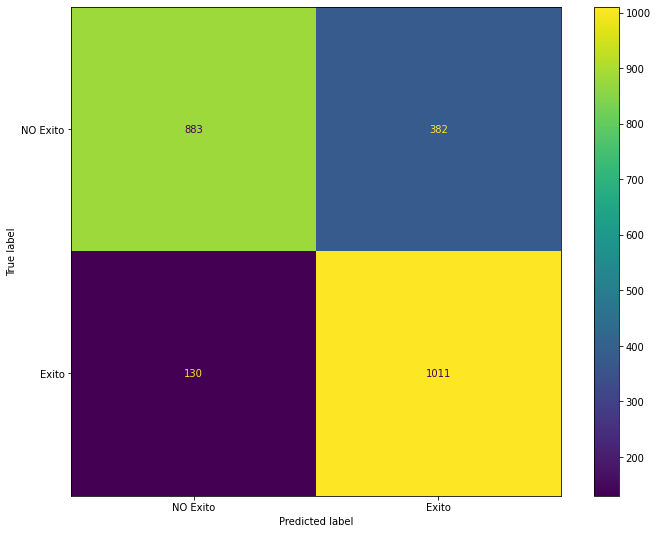

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelof, Xf_test, yf_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(yf_test, predsf)
confusion
#confusion.ravel()

array([[ 883,  382],
       [ 130, 1011]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(yf_test, predsf)
accuracy 

0.7871986699916874

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(yf_test, predsf) 

0.7257717157214645

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(yf_test, predsf) 

0.8860648553900088

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(yf_test, predsf) 

0.7979479084451461

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(yf_test, predsf))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1265
           1       0.73      0.89      0.80      1141

    accuracy                           0.79      2406
   macro avg       0.80      0.79      0.79      2406
weighted avg       0.80      0.79      0.79      2406



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelof.predict_proba(Xf_test)[:,1]
y_score1

array([0.77  , 0.02  , 0.485 , ..., 0.02  , 0.7825, 0.75  ])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yf_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(yf_test, y_score1))

roc_auc_score for DecisionTree:  0.8698257197590353


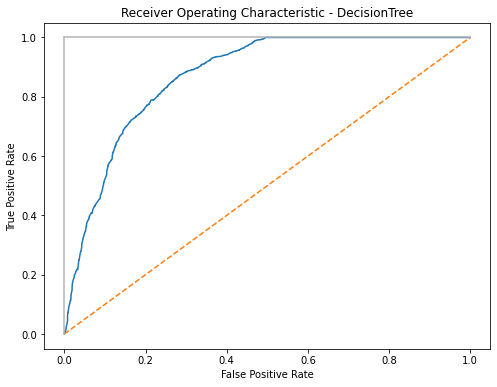

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
modelof.feature_importances_

array([0.06752416, 0.07506143, 0.06783532, 0.01127609, 0.03813977,
       0.03414314, 0.05984297, 0.06563402, 0.00845014, 0.06780231,
       0.06486171, 0.07566928, 0.36375965])

In [ ]:
len(modelof.feature_importances_)

13

In [ ]:
len(Xf_train.columns)

13

<BarContainer object of 13 artists>

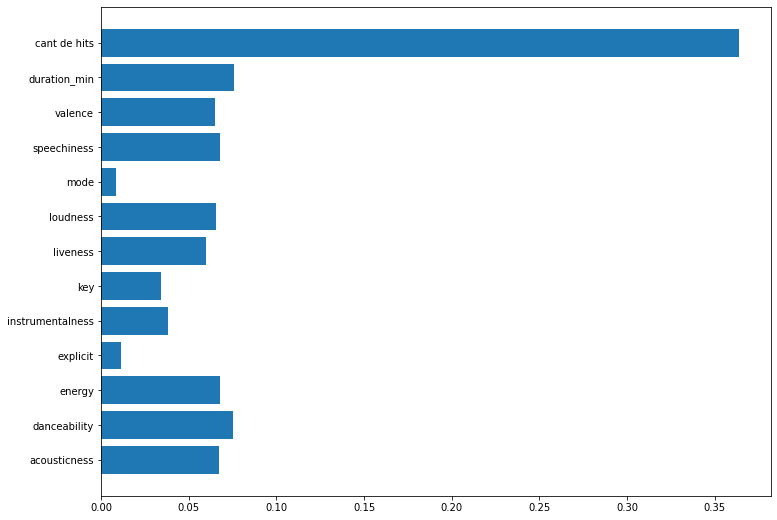

In [ ]:
plt.barh(Xf_train.columns, modelof.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

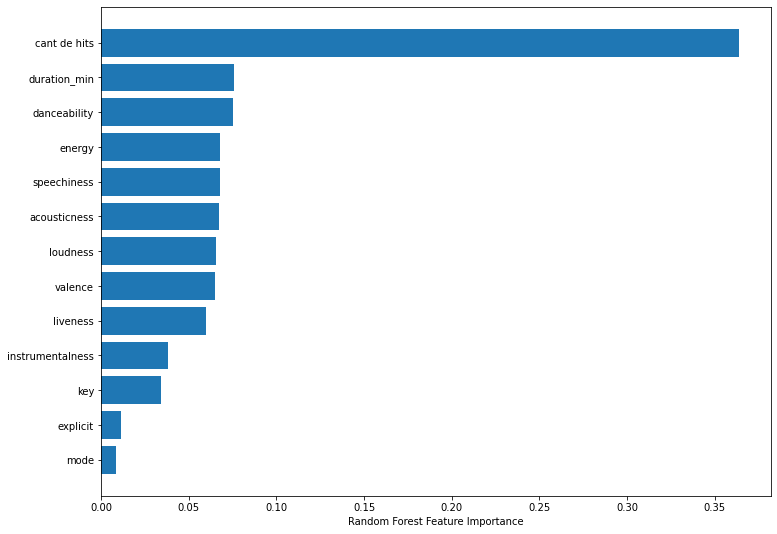

In [ ]:
sorted_idx = modelof.feature_importances_.argsort()
plt.barh(Xf_train.columns[sorted_idx], modelof.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### **Conclusión entrenamiento Machine Learning**

De todos los modelos de clasificación, el que obtuvo las mejores métricas fue el random forest, con los parámetros en default (random_state=1), entrenando 90%/10% y con la totalidad de las 12 variables: 'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'duration_min'.

Luego, creamos una variable sintética que cuente la cantidad de hits que tienen los artistas para poder mejorar el rendimiento del modelo. Entendemos que ciertos artistas tienen más popularidad que otros y esto podría ser una variable explicativa.

Probamos introducir esta nueva variable sintética en el modelo con el que obtuvimos mejores métricas y mejoró significativamente, obteniendose un accuracy de 78,72% y el ROC de 86,98%. Adicionalmente, se puede observar que la precisión y el f1 score aumenta tanto para los éxitos como para los no éxitos. Pasando de 69% de precisión para ambos en el modelo sin la nueva variable a 73% para éxitos y 87% para no éxitos. Lo mismo para el f1 score pasando de 71% a 78% para no éxitos y de 66% a 80% para éxitos. Se puede observar que la variable 'cant de hits' explica gran parte del modelo como habíamos supuesto.

### PCA (Principal Component Analysis)

También utilizamos PCA (Principal Component Analysis) para poder identificar las variables principales:

In [ ]:
# Cargamos dataset de spotify
data = Base.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)

# definimos matriz de diseño X y vector respuesta y
X = dataf.drop(['target'],1)
y = dataf['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

<ipython-input-68-7037963d615c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = Base.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year'],1)
<ipython-input-68-7037963d615c>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataf.drop(['target'],1)


In [ ]:
#Normalizamos los datos para que PCA funcione mejor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.23482401, 0.12886052, 0.10169893, 0.08541962, 0.08317101,
       0.07326522, 0.06726918, 0.05917607, 0.05171636, 0.04448374,
       0.03264156, 0.02463721, 0.01283658])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.6446384039900249


Utilizando PCA y tomando los 5 primeros componentes, el accuracy obtenido es de 64,46%, más bajo de lo que obtuvimos anteriormente. Por lo tanto, decidimos mantener todas las variables para lograr una mejor predicción.

## **CrossValidation**

Vamos a utilizar CrossValidation para buscar identificar las razones por las cuales hay o no mejoras en el desempeño del modelo de ML. 


Utilizando Grid Search

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
RandomForestClassifier(random_state=1).get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
params_grid = {
        'random_state': [1, 5, 10],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [5,6,7],
        'criterion':['entropy','gini']
        } # 648 combinaciones

Grid Search

In [ ]:
grid_cv = GridSearchCV(modelof, params_grid, scoring="accuracy", n_jobs=-1, cv=3) # 1944 pruebas
grid_cv.fit(Xf_train, yf_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(yf_test, grid_cv.predict(Xf_test)), 5)}')

Mejores Parametros {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'random_state': 5}
Mejor CV score 0.7685486719023306
Accuracy del modelo = 0.76351


Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_cv = RandomizedSearchCV(modelof, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(Xf_train, yf_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(yf_test, grid_cv.predict(Xf_test)), 5)}')

Mejores parametros {'random_state': 10, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'gini'}
Mejor score de CV 0.7679942969577116
Accuracy del modelo = 0.7685


Halving Grid Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

halving_cv = HalvingGridSearchCV(modelof, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(Xf_train, yf_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(yf_test, halving_cv.predict(Xf_test)), 5)}')

Mejores parametros {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'random_state': 1}
Mejor Score CV 0.7687968594250651
Accuracy del modelo = 0.76808


### Conclusión Cross Validation

Random forest con ajuste de parámetros y quitando las variables categóricas (key, explicit, mode):

In [ ]:
# Cargamos dataset de spotify
dataf = Base.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year','key','explicit','mode'],1)

# definimos matriz de diseño X y vector respuesta y
Xf = dataf.drop(['target'],1)
yf = dataf['target']

# Separamos en entrenamiento/test en razon 90/10 %
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf,test_size=0.1,random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelof = RandomForestClassifier(random_state= 10, max_features= 'sqrt', max_depth=7, criterion='gini')
modelof.fit(Xf_train, yf_train)
# Obtenemos las predicciones del modelo con X_test
predsf = modelof.predict(Xf_test) 

<ipython-input-112-676af2f518d4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataf = Base.drop(['artists','id','name','Instrumental','Danzable','Decadas','tempo','popularity','year','key','explicit','mode'],1)
<ipython-input-112-676af2f518d4>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xf = dataf.drop(['target'],1)


In [ ]:
Xf.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'duration_min',
       'cant de hits'],
      dtype='object')

In [ ]:
pd.DataFrame(yf_test)['target'].value_counts()

0    1265
1    1141
Name: target, dtype: int64

**Métricas**

1. Matriz de confusión:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

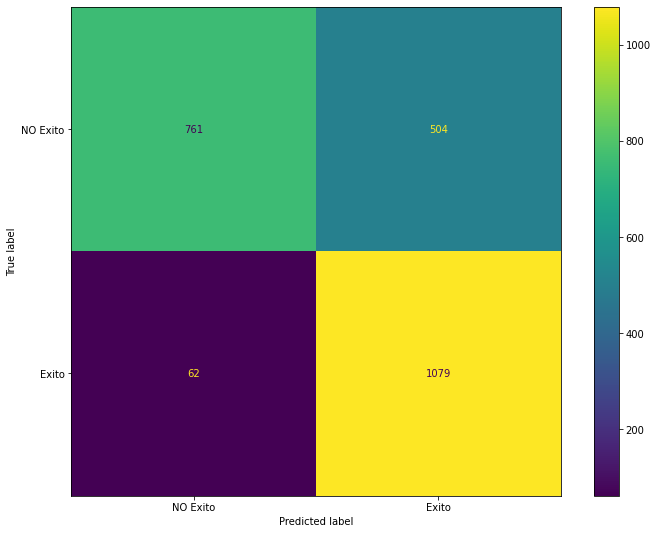

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelof, Xf_test, yf_test, display_labels=['NO Exito','Exito'])

In [ ]:
confusion = metrics.confusion_matrix(yf_test, predsf)
confusion
#confusion.ravel()

array([[ 761,  504],
       [  62, 1079]])

2. Accuracy:

In [ ]:
accuracy = metrics.accuracy_score(yf_test, predsf)
accuracy 

0.7647547797173733

3. Precision



In [ ]:
###Comprobar
from sklearn.metrics import precision_score
precision_score(yf_test, predsf) 

0.6816171825647505

4. Calcular la métrica Recall

In [ ]:
###Comprobar
from sklearn.metrics import recall_score
recall_score(yf_test, predsf) 

0.9456617002629273

5. Calcular la métrica F1 score

In [ ]:
###Completar
from sklearn.metrics import f1_score
f1_score(yf_test, predsf) 

0.7922173274596183

6. Classification_report

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(yf_test, predsf))

              precision    recall  f1-score   support

           0       0.92      0.60      0.73      1265
           1       0.68      0.95      0.79      1141

    accuracy                           0.76      2406
   macro avg       0.80      0.77      0.76      2406
weighted avg       0.81      0.76      0.76      2406



7. Calcular y plotear la Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predice la probabilidades de estar en la clase 1.
y_score1 = modelof.predict_proba(Xf_test)[:,1]
y_score1

array([0.59505897, 0.01736311, 0.49186991, ..., 0.02379751, 0.73071897,
       0.63208254])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yf_test, y_score1)

In [ ]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(yf_test, y_score1))

roc_auc_score for DecisionTree:  0.8570978234888611


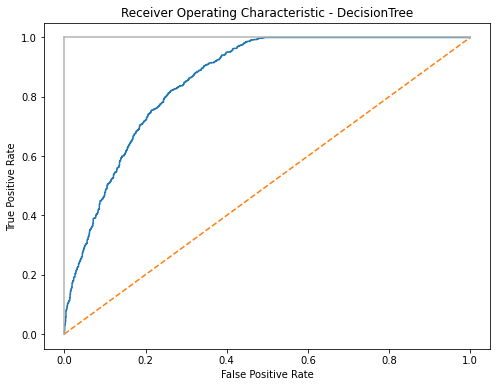

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Utilizando los diferentes métodos de Cross Validation, el máximo accuracy que obtenemos es de 76,85%, más bajo que el obtenido en el random forest realizado anteriormente.

Utilizando los mejores parámetros obtenidos desde Cross Validation y quitando las variables categóricas obtenemos un accuracy de 76,47%, un ROC de 85,71% y tanto la precisión como el f1 score para éxitos disminuyen respecto al modelo anterior. Cabe mencionar que la precisión para los no éxitos si aumenta en este modelo respecto al anterior. Sin embargo, como nuestro objetivo es la predicción de los éxitos, consideramos más relevante que estas métricas disminuyan en cuanto a los éxitos.

Por lo tanto, el mejor modelo que pudimos obtener fue realizando el random forest con random_state=1 y el resto de los parámetros en default y con todas las variables: 'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'duration_min', 'cant de hits' 

## **Conclusión Final**

Para nuestro modelo decidimos utilizar la última década (años 2010 a 2020) por su significatividad como vimos en el EDA.

También quitamos las siguientes variables del análisis: artists, id, name, Instrumental, Danzable (variables creadas para segmentar las variables instrumentalness y danceability), Decadas, tempo, year y popularity (variable a predecir). Dejando de esta manera las variables que observamos en el EDA como las más relevantes que influyen en la popularidad.

Luego, entrenamos varios modelos de machine learning: Random Forest, SVM, XGBClassifier y GradientBoost. A su vez, probamos estos modelos utilizando diferentes parámetros y % de train/test para observar cuales podrían predecir mejor si un track va a ser un éxito o no.

De todos los modelos, el que obtuvo las mejores métricas fue el random forest, con los parámetros en default (random_state=1), entrenando 90%/10% y con la totalidad de las 12 variables: 'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'duration_min'.

Luego, creamos una nueva variable que cuente la cantidad de hits que tienen los artistas para poder mejorar el rendimiento del modelo. Entendemos que ciertos artistas tienen más popularidad que otros y esto podría ser una variable explicativa.

Probamos introducir esta nueva variable sintética en el modelo con el que obtuvimos mejores métricas y mejoró significativamente, obteniendose un accuracy de 78,72% y el ROC de 86,98%. Adicionalmente, se puede observar que la precisión y el f1 score aumenta tanto para los éxitos como para los no éxitos. Pasando de 69% de precisión para ambos en el modelo sin la nueva variable a 73% para éxitos y 87% para no éxitos. Lo mismo para el f1 score pasando de 71% a 78% para no éxitos y de 66% a 80% para éxitos. Se puede observar que la variable 'cant de hits' explica gran parte del modelo como habíamos supuesto.

Utilizando PCA y tomando los 5 primeros componentes, el accuracy obtenido es de 64,46%, más bajo de lo que obtuvimos anteriormente. Por lo tanto, decidimos mantener todas las variables para lograr una mejor predicción.

Utilizando los diferentes métodos de Cross Validation, el máximo accuracy que obtenemos es de 76,85%, más bajo que el obtenido en el random forest realizado anteriormente.

Utilizando los mejores parámetros obtenidos desde Cross Validation y quitando las variables categóricas obtenemos un accuracy de 76,47%, un ROC de 85,71% y tanto la precisión como el f1 score para éxitos disminuyen respecto al modelo anterior. Cabe mencionar que la precisión para los no éxitos si aumenta en este modelo respecto al anterior. Sin embargo, como nuestro objetivo es la predicción de los éxitos, consideramos más relevante que estas métricas disminuyan en cuanto a los éxitos.

Por lo tanto, el mejor modelo que pudimos obtener fue realizando el random forest con random_state=1 y el resto de los parámetros en default y con todas las variables: 'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'duration_min', 'cant de hits'.